In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [6]:
# 데이터 로드
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


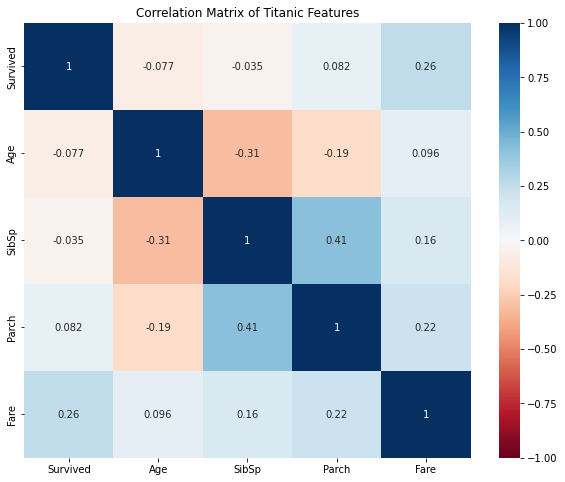

In [7]:
# 수치형 변수만 선택
numeric_cols = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare'] #SibSp: No. of siblings, #Parch: No. of parents / children, #Fare: 승객요금
titanic_numeric = df[numeric_cols]

# 1. 상관관계 행렬 계산
correlation_matrix = titanic_numeric.corr()

# 2. 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # 상관계수 표시
            cmap='RdBu',  # Red-Blue 컬러맵
            center=0,     # 0을 중심으로 색상 표시
            vmin=-1, vmax=1)
plt.title('Correlation Matrix of Titanic Features')
plt.show()

Text(0.5, 1.0, 'Age vs Survival')

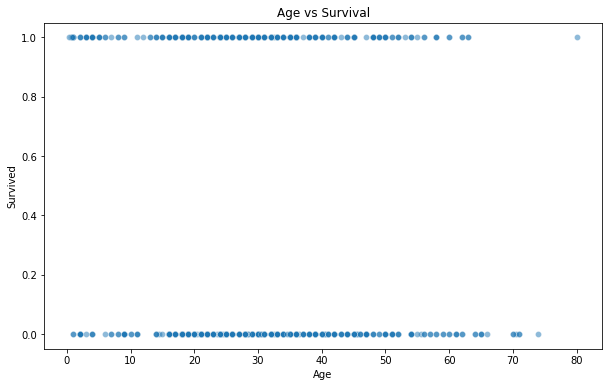

In [9]:
# 3. Survived와 Age의 관계를 scatter plot으로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Survived', alpha=0.5)
plt.title('Age vs Survival')

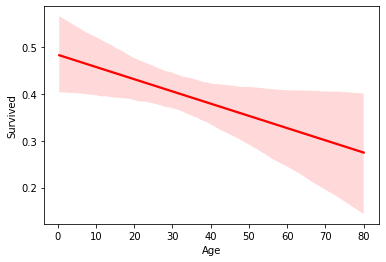

In [10]:
# 회귀선 추가
sns.regplot(data=df, x='Age', y='Survived', scatter=False, color='red')
plt.show()

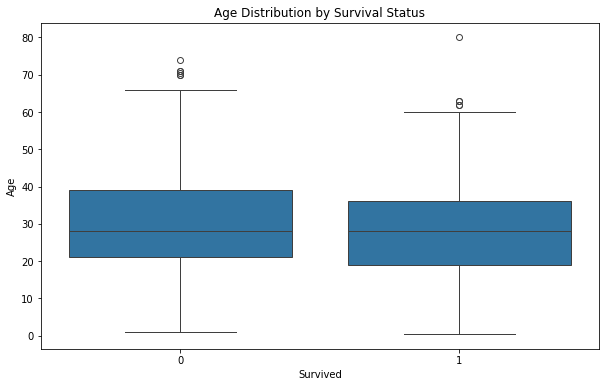

In [11]:
# 4. 생존/사망 그룹별 나이 분포 비교
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

In [15]:
# 5. 상관관계 통계 검정
def correlation_analysis(x, y):
    # 둘 다 NA가 아닌 데이터만 선택
    mask = ~(x.isna() | y.isna())
    x_clean = x[mask]
    y_clean = y[mask]
    
    # 피어슨 상관계수 및 p-value 계산
    correlation, p_value = stats.pearsonr(x_clean, y_clean)
    
    print(f"Pearson correlation coefficient: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Statistical significance: {'Significant' if p_value < 0.05 else 'Not significant'}")
    
    # 결정계수(R²) 계산
    r_squared = correlation ** 2
    print(f"R-squared: {r_squared:.4f}")
    
    # 데이터 크기 출력
    print(f"Sample size: {len(x_clean)}")

# 함수 실행
correlation_analysis(df['Age'], df['Survived'])


Pearson correlation coefficient: -0.0772
P-value: 0.0391
Statistical significance: Significant
R-squared: 0.0060
Sample size: 714


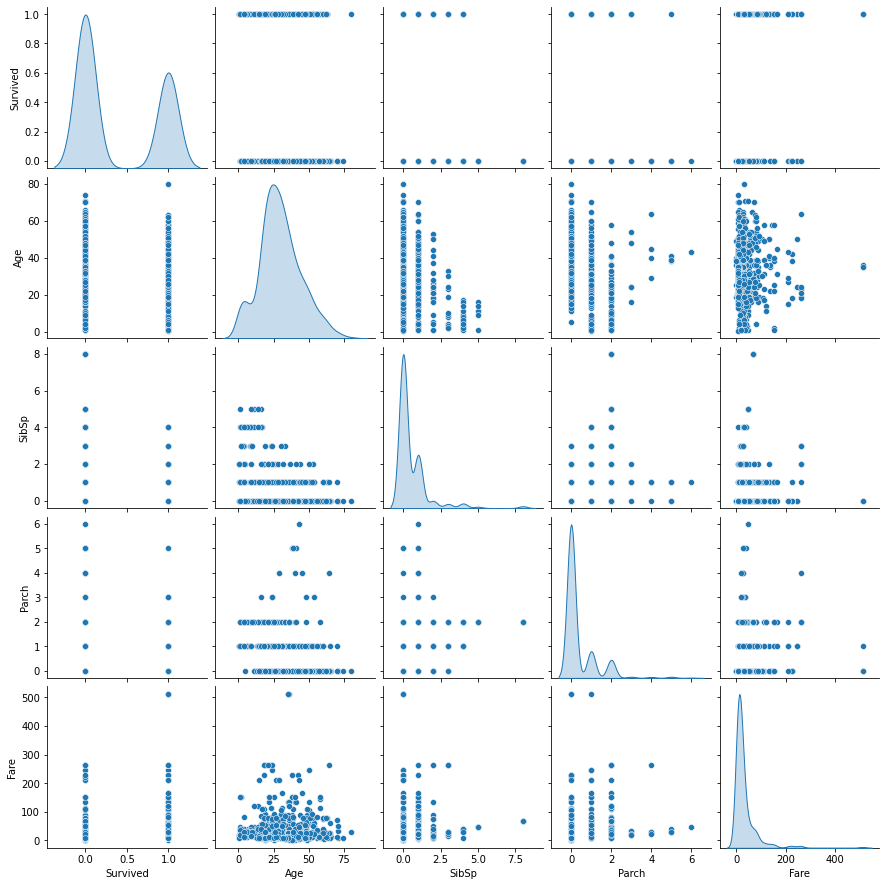

In [13]:
# 6. 여러 변수들의 산점도 행렬
sns.pairplot(titanic_numeric, diag_kind='kde')
plt.show()

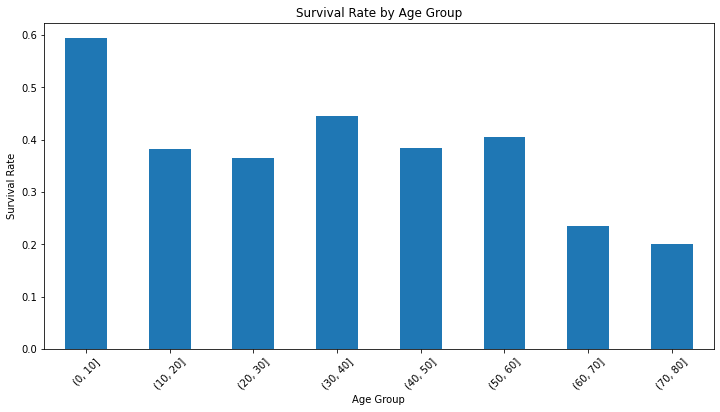

In [14]:
# 7. 특정 연령대별 생존율
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
age_survival = df.groupby('AgeGroup')['Survived'].mean()

plt.figure(figsize=(12, 6))
age_survival.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()